# This notebook is dedicated to a intuitive model
So no feature combining! This is basically the same as my base data in ANTM, but without BoxCox transforming the dependent variable because that is very hard to detransform in a meaningful way.

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_score,cross_val_predict

import statsmodels.formula.api as smf

In [2]:
basic_data = pd.read_pickle('full_country_data.pkl')
basic_data = basic_data.drop(['Continent','homeless','marriage','divorce','marr_div_ratio','malnutrition','pov_ind','FemalesNumber','MalesNumber','bc_BothSexes'],axis=1)
basic_data = basic_data.astype(float)
X,y = basic_data.drop('BothSexes',axis=1), basic_data['BothSexes']

In [3]:
X['gdp'] = np.log(X.gdp)
X['total_sex_ratio'] = 1/(X.total_sex_ratio)
X['guns'] = np.log(X.guns+1)
X['doc_ratio'] = np.log(X.doc_ratio)
X['pop_dens'] = np.log(X.pop_dens)
X['elevation'] = np.log(X.elevation)
X['immigrants'] = np.log(X.immigrants)
X['literacy'] = (X.literacy)**1/2
X['gdppp'] = np.log(X.gdppp)
X['population'] = np.log(X.population)
X['children'] = X.children**2
X['below_pov_line'] = np.log(X.below_pov_line)
X['wine'] = np.log(X.wine+1)
X['oth_alc'] = np.log(X.oth_alc+1)

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=8,shuffle=True)

In [5]:
train_whole = pd.concat([y_train,X_train],axis=1)
train_whole = train_whole.drop(['hum_freedom','gen_inequality'],axis=1,errors='ignore')

In [6]:
model = smf.ols("""BothSexes ~ happy+doc_ratio+below_pov_line+gdp+gdppp+unemp+med_age+med_age_male+med_age_female+birth_sex_ratio+total_sex_ratio+literacy+econ_freedom+sunny_hours+rainfall+pop_dens+avg_temp+int_users+eth_div+ling_div+relig_div+wto+alc_cons+beer+wine+spirits+oth_alc+total_bmi+fem_bmi+male_bmi+r_home_war+elevation+guns+farmers+depression+children+urbanization+immigrants+population+homeless_dummy+marr_div_dummy+malnutrition_dummy+pov_ind_dummy"""
                     ,data=train_whole)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              BothSexes   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     3.191
Date:                Fri, 19 Apr 2019   Prob (F-statistic):           1.04e-06
Time:                        15:58:16   Log-Likelihood:                -392.56
No. Observations:                 146   AIC:                             869.1
Df Residuals:                     104   BIC:                             994.4
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             62.0882     35.827      1.733      0.086      -8.958     133.134
happy                  0.1450      0.674      0.215      0.830      -1.192       1.482
doc_ratio             -0.9428      0.728     -1.295      0.198      -2.387       0.501
below_pov_line        -0.4866      0.809     -0.602      0.549      -2.090       1.117
gdp                   -0.4939      1.178     -0.419      0.676      -2.830       1.842
gdppp                  2.6081      1.257      2.075      0.040       0.116       5.100
unemp                 -0.1311      0.071     -1.843      0.068      -0.272       0.010
med_age                1.2668      3.294      0.385      0.701      -5.266       7.799
med_age_male          -1.6485      1.762     -0.936      0.352      -5.142       1.845
med_age_female         0.5137      1.701      0.302      0.763      -2.860       3.888
birth_sex_ratio      -35.3541     21.950     -1.611      0.110     -78.882       8.174
total_sex_ratio       -4.7962      9.979     -0.481      0.632     -24.586      14.993
literacy              -0.0755      0.081     -0.930      0.355      -0.237       0.086
econ_freedom          -0.7339      0.767     -0.957      0.341      -2.255       0.787
sunny_hours           -0.0024      0.001     -1.772      0.079      -0.005       0.000
rainfall            -8.14e-05      0.001     -0.090      0.928      -0.002       0.002
pop_dens              -0.2700      0.364     -0.742      0.460      -0.992       0.452
avg_temp              -0.1402      0.097     -1.443      0.152      -0.333       0.053
int_users             -0.0962      0.042     -2.290      0.024      -0.180      -0.013
eth_div               -0.6984      2.580     -0.271      0.787      -5.814       4.417
ling_div              -0.5976      2.247     -0.266      0.791      -5.054       3.859
relig_div              0.9719      2.130      0.456      0.649      -3.251       5.195
wto                   -3.2675      2.116     -1.544      0.126      -7.464       0.929
alc_cons               0.3964      0.151      2.625      0.010       0.097       0.696
beer                  -0.0169      0.027     -0.631      0.529      -0.070       0.036
wine                  -0.8057      0.514     -1.568      0.120      -1.824       0.213
spirits                0.0111      0.027      0.407      0.685      -0.043       0.065
oth_alc                0.0757      0.527      0.144      0.886      -0.970       1.121
total_bmi              1.7860      8.893      0.201      0.841     -15.850      19.422
fem_bmi               -0.1568      4.522     -0.035      0.972      -9.125       8.811
male_bmi              -2.2570      4.442     -0.508      0.612     -11.066       6.552
r_home_war            -1.1767      1.245     -0.945      0.347      -3.646       1.293
elevation             -0.5537      0.4

In [7]:
kf = KFold(10,shuffle=True,random_state=13)

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [9]:
lasso = LassoCV(cv = kf,max_iter=100000)
lass_results = lasso.fit(X_scaled,y_train)
best_alpha_l = lass_results.alpha_

ridge = RidgeCV(cv = kf)
ridge_results = ridge.fit(X_scaled,y_train)
best_alpha_r = ridge_results.alpha_

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [10]:
def model_competition(feature_matrix,target_series,l_alpha,r_alpha):
    ols = LinearRegression()
    lasso = Lasso(alpha = l_alpha)
    ridge = Ridge(alpha = r_alpha)
    models = {ols:'OLS',lasso:'lasso',ridge:'ridge'}
    for model in models.keys() :
        if model == ols :
            r2 = cross_val_score(model, feature_matrix, target_series,cv=kf, scoring='r2')
            print(f'The mean r2 for {models[model]} is {np.mean(r2)} +- {np.std(r2)}.')
        else :
            scaler = StandardScaler()
            X_scaled = scaler.fit_transform(feature_matrix)
            r2 = cross_val_score(model, X_scaled, target_series,cv=kf, scoring='r2')
            print(f'The mean r2 for {models[model]} is {np.mean(r2)} +- {np.std(r2)}.')

In [11]:
model_competition(X_train,y_train,best_alpha_l,best_alpha_r)

The mean r2 for OLS is -0.4765494719602751 +- 0.9233917858795521.
The mean r2 for lasso is 0.046897981218970694 +- 0.3225160645355197.
The mean r2 for ridge is -0.13044316661731403 +- 0.48331175603002013.


# That's... low
Let's see what lasso tells us to cut.

In [12]:
lasso = Lasso()
results = lasso.fit(X_train,y_train)
print(f'Lasso test R^2: {lasso.score(X_train,y_train)}')

list(zip(X_train.columns,results.coef_))


Lasso test R^2: 0.40626723618159255


[('happy', -0.0),
 ('doc_ratio', -0.0),
 ('below_pov_line', -0.0),
 ('gdp', 0.0),
 ('gdppp', 0.0),
 ('unemp', -0.06849526344235547),
 ('med_age', 0.0),
 ('med_age_male', -0.0),
 ('med_age_female', 0.0),
 ('birth_sex_ratio', -0.0),
 ('total_sex_ratio', 0.0),
 ('literacy', -0.011768288990724124),
 ('hum_freedom', -0.0),
 ('econ_freedom', -0.0),
 ('gen_inequality', 0.0),
 ('sunny_hours', -0.002015692003592003),
 ('rainfall', -0.0),
 ('pop_dens', -0.0),
 ('avg_temp', -0.07580890951836274),
 ('int_users', -0.0693319028594596),
 ('eth_div', 0.0),
 ('ling_div', 0.0),
 ('relig_div', 0.0),
 ('wto', -0.0),
 ('alc_cons', 0.563603686520315),
 ('beer', -0.01913681797706965),
 ('wine', -0.0),
 ('spirits', 0.002260254698316479),
 ('oth_alc', 0.0),
 ('total_bmi', -0.0),
 ('fem_bmi', -0.0),
 ('male_bmi', -0.02737849652972979),
 ('r_home_war', -0.0),
 ('elevation', -0.0),
 ('guns', 0.0),
 ('farmers', 0.0035091300646504986),
 ('depression', -0.003946795254009242),
 ('children', 0.0013718958270913248),
 (

Uhhhhh... okay. Let's take that one by one, removing only those that raise the $R^2$.

In [13]:
X_train_dropping = X_train.drop([
    'happy','doc_ratio','below_pov_line','gdp','med_age','med_age_male','total_sex_ratio','hum_freedom',
    'econ_freedom','rainfall','eth_div','ling_div','relig_div','wto','beer','spirits','wine','fem_bmi','male_bmi','r_home_war',
    'guns','population','homeless_dummy','marr_div_dummy','malnutrition_dummy','pov_ind_dummy','gen_inequality'],
    axis=1)

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_dropping)

In [15]:
lasso = LassoCV(cv = kf)
lass_results = lasso.fit(X_scaled,y_train)
best_alpha_l_d = lass_results.alpha_

ridge = RidgeCV(cv = kf)
ridge_results = ridge.fit(X_scaled,y_train)
best_alpha_r_d = ridge_results.alpha_

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [16]:
model_competition(X_train_dropping,y_train,best_alpha_l_d,best_alpha_r_d)

The mean r2 for OLS is 0.03809061125244956 +- 0.4179302227916538.
The mean r2 for lasso is 0.12346740149691356 +- 0.315479271845533.
The mean r2 for ridge is 0.09803223359713382 +- 0.34172902391776433.


### Cool.
The $R^2$ values increased. Let's try dropping a few more things that lasso suggests, just in case - it's the only thing we really can do, given that we are going for interpretability.

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_dropping)

In [18]:
lasso = Lasso(alpha=1.5)
results = lasso.fit(X_train_dropping,y_train)
print(f'Lasso test R^2: {lasso.score(X_train_dropping,y_train)}')

list(zip(X_train_dropping.columns,results.coef_))

Lasso test R^2: 0.3917225159867017


[('gdppp', 0.0),
 ('unemp', -0.06651321651972165),
 ('med_age_female', 0.0),
 ('birth_sex_ratio', -0.0),
 ('literacy', -0.0),
 ('sunny_hours', -0.0019753529079410523),
 ('pop_dens', -0.0),
 ('avg_temp', -0.08168724012227921),
 ('int_users', -0.06687572155430865),
 ('alc_cons', 0.5301535854844829),
 ('oth_alc', 0.0),
 ('total_bmi', -0.0),
 ('elevation', -0.0),
 ('farmers', 0.004724608231239596),
 ('depression', -0.003919038386959705),
 ('children', 0.00146846862677663),
 ('urbanization', 0.035941606185399544),
 ('immigrants', -0.0)]

In [19]:
X_train_dropping_2 = X_train_dropping.drop(['med_age_female','gdppp','literacy','pop_dens','oth_alc',
                                            'immigrants','sunny_hours','farmers','children'],axis=1)

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_dropping_2) 

lasso = LassoCV(cv = kf,max_iter=100000)
lass_results = lasso.fit(X_scaled,y_train)
best_alpha_l_d2 = lass_results.alpha_

ridge = RidgeCV(cv = kf)
ridge_results = ridge.fit(X_scaled,y_train)
best_alpha_r_d2 = ridge_results.alpha_

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [21]:
model_competition(X_train_dropping_2,y_train,best_alpha_l_d2,best_alpha_r_d2)

The mean r2 for OLS is 0.16521922720787563 +- 0.34692008466843205.
The mean r2 for lasso is 0.16515854733515795 +- 0.34624015009450815.
The mean r2 for ridge is 0.16730904672194555 +- 0.3229960483938119.


### Cool, higher $R^2$.
So lasso is our best model right now. But if we try it on test...

In [22]:
X_test_dropping = X_test.drop(['happy','doc_ratio','below_pov_line','gdp','med_age','med_age_male','total_sex_ratio',
                               'hum_freedom','econ_freedom','rainfall','eth_div','ling_div','relig_div','wto','wine',
                               'fem_bmi','male_bmi','r_home_war','guns','population','homeless_dummy',
                               'marr_div_dummy','malnutrition_dummy','pov_ind_dummy','gen_inequality',
                               'med_age_female','gdppp','literacy','pop_dens','spirits','oth_alc','immigrants',
                               'sunny_hours','beer','farmers','children'],axis=1)

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_dropping_2)
X_test_d_scaled = scaler.transform(X_test_dropping)


lasso = LassoCV(cv = kf,max_iter=100000)
lass_results = lasso.fit(X_scaled,y_train)
best_alpha_l_d = lass_results.alpha_

In [24]:
lasso = Lasso(alpha=best_alpha_l_d)
results = lasso.fit(X_train_dropping_2,y_train)
print(f'Lasso Regression test R^2: {lasso.score(X_test_d_scaled,y_test)}')

Lasso Regression test R^2: -94.68904655088642


# Big oof.
What went wrong? Too few samples! Ridge and lasso don't work well if you have too little data. I guess that means we have to rely on naïve OLS, which was not affected by dropping the last thing. Let's try dropping more, just in case.

In [25]:
lasso = Lasso(alpha=1)
results = lasso.fit(X_train_dropping_2,y_train)
print(f'Lasso test R^2: {lasso.score(X_train_dropping_2,y_train)}')

list(zip(X_train_dropping_2.columns,results.coef_))

Lasso test R^2: 0.38521457241003665


[('unemp', -0.08260680562543408),
 ('birth_sex_ratio', -0.0),
 ('avg_temp', -0.0920639102532126),
 ('int_users', -0.09205403534900074),
 ('alc_cons', 0.6422228652342806),
 ('total_bmi', -0.08286534431513869),
 ('elevation', -0.0),
 ('depression', -0.003960358154899907),
 ('urbanization', 0.040920484309064316)]

In [26]:
X_train_keep_dropping = X_train_dropping_2.drop(['birth_sex_ratio'],axis=1)

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_keep_dropping) 

lasso = LassoCV(cv = kf,max_iter=100000)
lass_results = lasso.fit(X_scaled,y_train)
best_alpha_l_kd = lass_results.alpha_

ridge = RidgeCV(cv = kf)
ridge_results = ridge.fit(X_scaled,y_train)
best_alpha_r_kd = ridge_results.alpha_

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [28]:
model_competition(X_train_keep_dropping,y_train,best_alpha_l_d2,best_alpha_r_d2)

The mean r2 for OLS is 0.13696003554572078 +- 0.36245258433652344.
The mean r2 for lasso is 0.13691412055103 +- 0.36210612134047576.
The mean r2 for ridge is 0.13536097668445835 +- 0.3457587645076947.


# That didn't work.
Let's try dropping at random instead.

In [29]:
X_train_dropping_2.columns

Index(['unemp', 'birth_sex_ratio', 'avg_temp', 'int_users', 'alc_cons',
       'total_bmi', 'elevation', 'depression', 'urbanization'],
      dtype='object')

In [30]:
X_train_keep_dropping = X_train_dropping_2.drop([],axis=1)

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_keep_dropping) 

lasso = LassoCV(cv = kf,max_iter=100000)
lass_results = lasso.fit(X_scaled,y_train)
best_alpha_l_kd = lass_results.alpha_

ridge = RidgeCV(cv = kf)
ridge_results = ridge.fit(X_scaled,y_train)
best_alpha_r_kd = ridge_results.alpha_

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [32]:
model_competition(X_train_keep_dropping,y_train,best_alpha_l_d2,best_alpha_r_d2)

The mean r2 for OLS is 0.16521922720787563 +- 0.34692008466843205.
The mean r2 for lasso is 0.16515854733515795 +- 0.34624015009450815.
The mean r2 for ridge is 0.16730904672194555 +- 0.3229960483938119.


In [33]:
'+'.join(list(X_train_keep_dropping.columns))

'unemp+birth_sex_ratio+avg_temp+int_users+alc_cons+total_bmi+elevation+depression+urbanization'

# Having maximised our $R^2$...

Without needing to drop anything else, let's work on p-values. Significance value of ~.1 let's say.

In [34]:
model = smf.ols("""BothSexes ~ birth_sex_ratio+avg_temp+int_users+alc_cons+total_bmi+elevation+urbanization"""
                     ,data=train_whole)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              BothSexes   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     14.27
Date:                Fri, 19 Apr 2019   Prob (F-statistic):           7.25e-14
Time:                        15:58:18   Log-Likelihood:                -412.25
No. Observations:                 146   AIC:                             840.5
Df Residuals:                     138   BIC:                             864.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          72.8180     18.930      3.847      0.000      35.387     110.249
birth_sex_ratio   -45.8606     17.198     -2.667      0.009     -79.867     -11.855
avg_temp           -0.1283      0.058     -2.230      0.027      -0.242      -0.015
int_users          -0.0915      0.023     -4.003      0.000      -0.137      -0.046
alc_cons            0.6871      0.105      6.526      0.000       0.479       0.895
total_bmi          -0.3976      0.180     -2.203      0.029      -0.754      -0.041
elevation          -0.7379      0.398     -1.853      0.066      -1.525       0.049
urbanization        0.0439      0.022      2.035      0.044       0.001       0.087
==============================================================================
Omnibus:                       43.310   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.824
Skew:                           1.231   Prob(JB):                     7.75e-23
Kurtosis:                       6.267   Cond. No.                     6.68e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### There were none! Great.
But we don't want high p-values, so let's run with it, despite that honestly terrible standard deviation of $R^2$.

In [35]:
final_cols = ['birth_sex_ratio','avg_temp','int_users','alc_cons','total_bmi','elevation','urbanization']

In [36]:
X_train_drop = X_train.drop(X_train.columns.difference(final_cols),axis=1)

In [37]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_drop)
lasso = LassoCV(alphas=10**np.linspace(-10,10,1001),cv=kf)
results = lasso.fit(X_scaled,y_train)
importances = list(zip(X_train_drop.columns,abs(results.coef_)/np.sum(list(abs(results.coef_)))))

In [38]:
pd.DataFrame(importances).sort_values(by=1,ascending=False)

,0,1
3,alc_cons,0.284092
2,int_users,0.253085
1,avg_temp,0.105119
0,birth_sex_ratio,0.098516
6,urbanization,0.098514
4,total_bmi,0.090439
5,elevation,0.070236


In [39]:
X_test_drop = X_test.drop(X_test.columns.difference(final_cols),axis=1)

In [55]:
lm_ols = LinearRegression()
results = lm_ols.fit(X_train_drop,y_train)

print(f'OLS test R^2: {lm_ols.score(X_test_drop,y_test)}.')

OLS test R^2: 0.16959419677607257.


In [56]:
pd.DataFrame(list(zip(X_test_drop.columns,lm_ols.coef_)))

,0,1
0,birth_sex_ratio,-45.860566
1,avg_temp,-0.128297
2,int_users,-0.091469
3,alc_cons,0.687086
4,total_bmi,-0.397567
5,elevation,-0.737891
6,urbanization,0.043897


In [57]:
predict = lm_ols.predict(X_test_drop)

In [58]:
(np.sum((y_test-predict)**2))

1147.546307967178

In [59]:
np.mean(abs((y_test-predict)))

4.18724412316747

In [60]:
np.max(abs(y_test-predict))

17.42485027581258

In [61]:
np.min(abs(y_test-predict))

0.3716962043633085

In [62]:
np.std(abs(y_test-predict))

3.671750499856096

In [63]:
np.median(abs(y_test-predict))

3.1219495513423823

# This is an okay model.
While it may be more interpretable, it is worse at predicting by half.

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

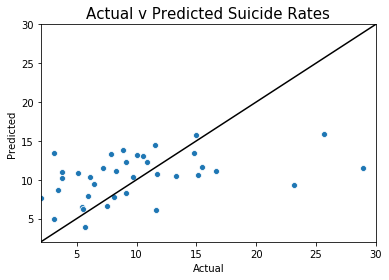

In [65]:
sns.scatterplot(y_test,predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual v Predicted Suicide Rates',fontdict = {'size':15})
plt.xlim(2,30)
plt.ylim(2,30)
plt.plot([2,30],[2,30],color='k')

(array([1., 7., 9., 7., 6., 4., 0., 1., 1., 1.]),
 array([-10.39184008,  -7.61017104,  -4.82850201,  -2.04683297,
          0.73483606,   3.5165051 ,   6.29817413,   9.07984317,
         11.8615122 ,  14.64318124,  17.42485028]),
 <a list of 10 Patch objects>)

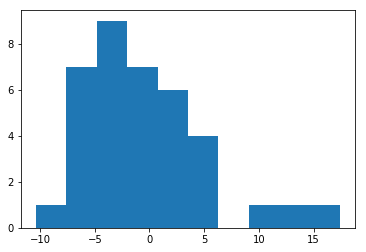

In [66]:
plt.hist(y_test-predict)